In [1]:
import copy
import numpy as np
import palettable

In [2]:
import linefinder.analyze_data.worldlines as worldlines
import linefinder.analyze_data.plot_worldlines as plot_worldlines

In [3]:
import galaxy_dive.plot_data.plotting as plotting

# Load the Data

In [4]:
w = worldlines.Worldlines(
    data_dir = '/scratch/03057/zhafen/linefinder_data/multiphysics/m12i_res7100_mhdcv/data',
    tag = 'm12imhdcv_clustersofFIRE_pop1',
    halo_data_dir = '/scratch/03057/zhafen/multiphysics/m12i_res7100_mhdcv/halo',
    main_halo_id = 0,
)

In [5]:
w_plotter = plot_worldlines.WorldlinesPlotter( w, )

In [6]:
# We'll explore classifications relative to this snapshot
snum = 600
ind = snum - 600

# Explore the Data

## What Fraction of IDs are Still Gas by $z=0$?

In [7]:
p_types = w.get_data( 'PType' )
n_stars = np.sum( p_types[:,ind] == 4 )
n_gas = np.sum( p_types[:,ind] == 0 )
n_stars, n_gas

(67025, 0)

Good, these are all stars by $z=0$

## Look at Radial History versus Time for a Few Particles

### Plot

In [8]:
gas_to_star_line_features = {
    'is_star': {
        'key': 'PType',
        'value': 4,
        'data_kwargs': {},
        'line_attrs': {
            'linewidth': 3,
            'color': 'k',
            },
    },
    'is_gas': {
        'key': 'PType',
        'value': 0,
        'data_kwargs': {},
        'line_attrs': {
            'linewidth': 2,
            'color': 'k',
            'linestyle': '--',
            },
        }
}

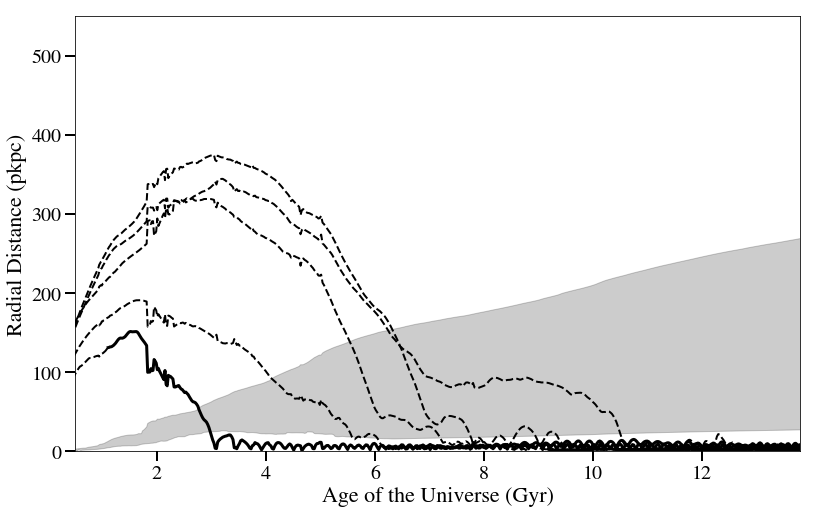

In [9]:
fig = plt.figure( figsize=(13,8), facecolor='w' )
ax = plt.gca()

w_plotter.plot_streamlines_vs_time(
    y_key = 'R',
    classification = 'is_in_main_gal', # Make sure we select particles in the main galaxy at z=0
    classification_ind = ind,
    start_ind = 0,
    end_ind = 600,
    sample_size = 5,
#     y_data_kwargs = { 'smooth_data' : True },
    ax = ax,
    x_range = [0.5, 13.8 ],
    y_range = [0., 550., ],
    horizontal_line_value = None,
    plot_CGM_region = True,
    return_y_max = True,
    vert_line_ind = None,
    line_features = gas_to_star_line_features,
)

fig

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


File saved at ./plots/r_vs_time_ind2.pdf


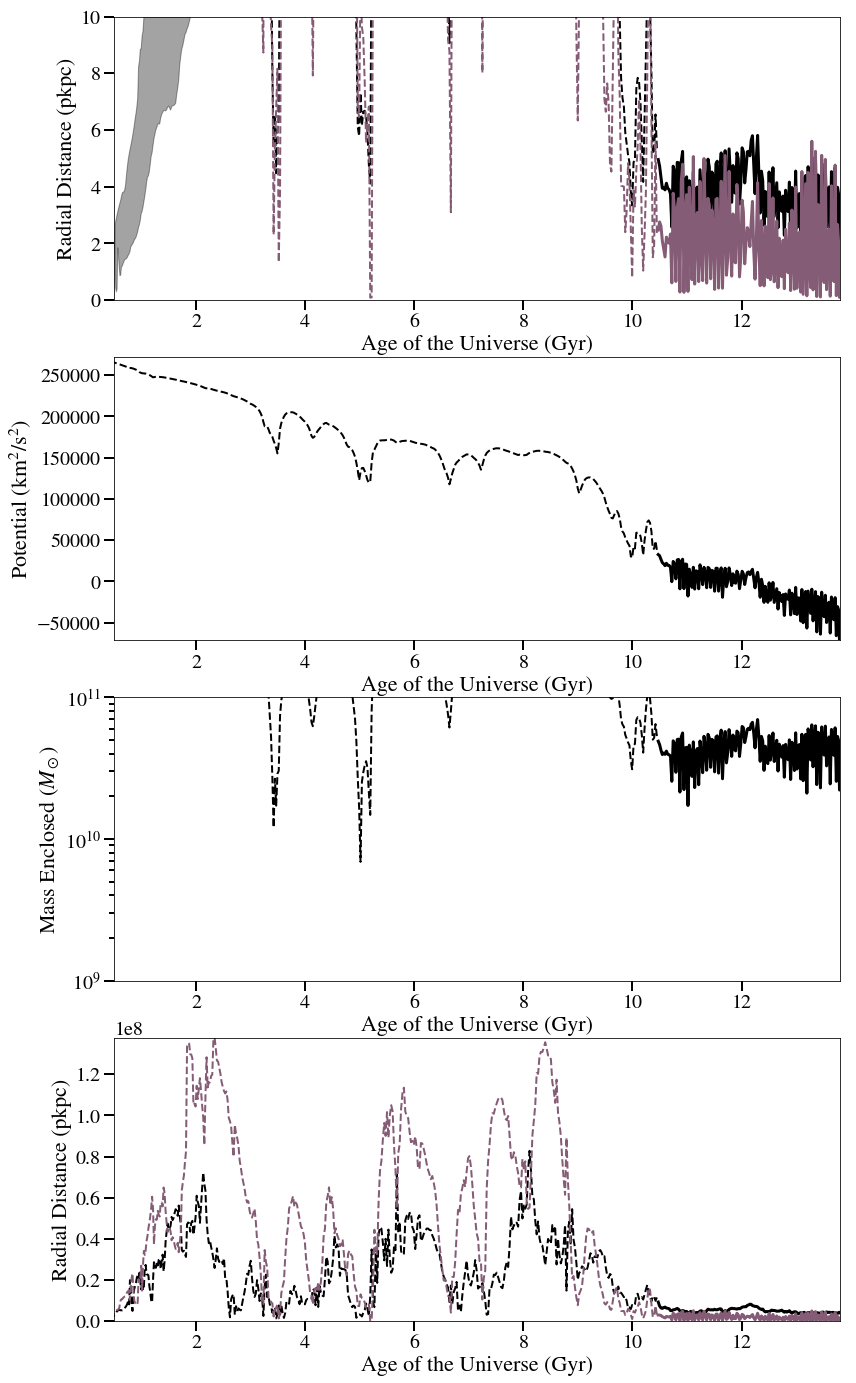

In [10]:
n_rows = 4

fig = plt.figure( figsize=(13,6*n_rows), facecolor='w' )
ax = plt.gca()

gs = matplotlib.gridspec.GridSpec(n_rows,1)

sample_ind = 2
sample_inds = [ sample_ind, ]

shared_args = {
    'classification_ind': ind,
    'start_ind': 1,
    'end_ind': 600,
    'sample_size': 1,
    'sample_inds': sample_inds,
    'horizontal_line_value': None,
    'vert_line_ind': None,
    'line_features': gas_to_star_line_features,
}

w_plotter.plot_streamlines_vs_time(
    y_key = 'R',
    ax = plt.subplot(gs[0,0]),
    x_range = [0.5, 13.8 ],
    y_range = [0., 10., ],
    plot_CGM_region = True,
    **shared_args
)
rc_args = copy.deepcopy( shared_args )
rc_color = palettable.cartocolors.qualitative.Antique_2.mpl_colors[0]
rc_args['line_features']['is_star']['line_attrs']['color'] = rc_color
rc_args['line_features']['is_gas']['line_attrs']['color'] = rc_color
w_plotter.plot_streamlines_vs_time(
    y_key = 'rc_iso_pot',
    ax = plt.subplot(gs[0,0]),
    x_range = [0.5, 13.8 ],
    y_range = [0., 10., ],
    plot_CGM_region = True,
    color = 'blue',
    **rc_args
)

w_plotter.plot_streamlines_vs_time(
    y_key = 'Potential',
    ax = plt.subplot(gs[1,0]),
    x_range = [0.5, 13.8 ],
#     y_range = [0., 30., ],
    y_label = r'Potential (km$^2$/s$^2$)',
    **shared_args
)

w_plotter.plot_streamlines_vs_time(
    y_key = 'M_enc',
    ax = plt.subplot(gs[2,0]),
    x_range = [0.5, 13.8 ],
    y_range = [1e9, 1e11, ],
    y_scale = 'log',
    y_label = r'Mass Enclosed ($M_\odot$)',
    **shared_args
)

w_plotter.plot_streamlines_vs_time(
    y_key = 'Lmag',
    ax = plt.subplot(gs[3,0]),
    x_range = [0.5, 13.8 ],
#     y_range = [0., 30., ],
    y_label = r'Angular Momentum (kpc km/s)',
    **shared_args
)
jc_args = copy.deepcopy( shared_args )
jc_color = palettable.cartocolors.qualitative.Antique_2.mpl_colors[0]
jc_args['line_features']['is_star']['line_attrs']['color'] = jc_color
jc_args['line_features']['is_gas']['line_attrs']['color'] = jc_color
w_plotter.plot_streamlines_vs_time(
    y_key = 'jc_iso_pot',
    ax = plt.subplot(gs[3,0]),
    x_range = [0.5, 13.8 ],
#     y_range = [0., 10., ],
    plot_CGM_region = False,
    **jc_args
)

save_file = 'r_vs_time_ind{}.pdf'.format( sample_ind )
plotting.save_fig(
    out_dir = './plots',
    save_file = save_file,
    fig = fig,
)

fig

In [11]:
w.v_c

snum
600    131.662641
599    131.665659
598    131.669369
597    131.673250
596    131.676703
595    131.680767
594    131.681257
593    131.685324
592    131.689910
591    131.694241
590    131.698658
589    131.736680
588    131.774126
587    131.807429
586    131.850432
585    131.894242
584    131.939029
583    131.984026
582    132.030358
581    132.074273
580    132.116737
579    132.154859
578    132.201804
577    132.245124
576    132.291180
575    132.335022
574    132.381928
573    132.428785
572    132.478079
571    132.531496
          ...    
30      35.096383
29      34.956404
28      34.672232
27      34.423526
26      33.997742
25      33.482156
24      33.014849
23      32.437315
22      31.974731
21      31.395865
20      29.988867
19      28.606246
18      26.967879
17      25.856938
16      25.560492
15      25.743425
14      25.931164
13      25.847546
12      25.600486
11      25.238530
10      24.834093
9       23.968530
8       23.741218
7       22.389054
6    

In [12]:
w.get_data( 'M' )

array([[ 5072.761 ,  5072.761 ,  5072.761 , ...,  7067.277 ,  7067.277 ,
         7067.277 ],
       [ 5137.088 ,  5137.088 ,  5137.088 , ...,  7067.277 ,  7067.277 ,
         7067.277 ],
       [ 6580.3496,  6580.3496,  6580.3496, ...,  7067.277 ,  7067.277 ,
         7067.277 ],
       ...,
       [16250.072 , 16250.072 , 16250.072 , ...,  7067.277 ,  7067.277 ,
         7067.277 ],
       [ 4674.6025,  4674.6025,  4674.6025, ...,  7067.277 ,  7067.277 ,
         7067.277 ],
       [ 4477.594 ,  4477.594 ,  4477.594 , ...,  7067.277 ,  7067.277 ,
         7067.277 ]], dtype=float32)

In [13]:
w.get_data( 'L' )

array([[[-4.09037438e+05, -2.44834266e+05, -8.37060000e+04, ...,
          1.19650925e+06,  1.07526175e+06,  9.09022000e+05],
        [ 2.76024414e+04, -3.68540938e+04, -5.35744688e+04, ...,
          1.48508400e+06,  1.26866938e+06,  1.09093662e+06],
        [-2.40624775e+06, -2.18259000e+06, -1.94130112e+06, ...,
          7.21881500e+05,  6.36883125e+05,  6.34167750e+05],
        ...,
        [-7.60788750e+06, -7.65578850e+06, -7.63110300e+06, ...,
          9.66055300e+06,  8.96261800e+06, -3.78209727e+04],
        [-1.62845338e+06, -1.69521662e+06, -1.72157925e+06, ...,
         -2.85436720e+07, -2.73835380e+07, -2.20120820e+07],
        [ 5.03381602e+04,  1.55555531e+05,  2.60444531e+05, ...,
          6.73489050e+06,  7.68034600e+06,  9.42373750e+05]],

       [[-1.77154188e+05, -1.52137500e+05, -1.57906969e+05, ...,
          1.24307162e+06,  1.21031775e+06,  8.39020188e+05],
        [ 1.16317328e+05,  1.69633094e+05,  1.79787344e+05, ...,
          3.41227475e+06,  3.34307825e

In [14]:
np.median( ( w.get_data( 'Lmag' ) / w.get_data( 'jc_iso_pot' ) ) )

0.7807782665243495

In [15]:
( w.get_data( 'rc_iso_pot' ) * w.v_c.values )[sample_inds].shape

(1, 600)

In [16]:
w.base_data_shape

(67025, 600)

In [17]:
w.get_data( 'Lmag' )

array([[  590411.40647053,   454050.81019772,   361295.01344757, ...,
         2144950.23995073,  2090602.21922913,  1420090.37275548],
       [  252440.49759532,   253708.44878926,   258865.88882562, ...,
         8560158.72892984,  8444255.76949958,  6048292.73917859],
       [ 4299146.22594302,  4201241.05921817,  4133507.27077548, ...,
         2453217.6746936 ,  2437852.0598869 ,  2126558.52497339],
       ...,
       [26761023.09489726, 26781905.48726467, 26820920.81131052, ...,
        13801726.24118995, 12674069.31825655,  3883605.16553133],
       [ 2814865.96040491,  2878348.45568137,  2935224.29880095, ...,
        29342829.19890698, 28112118.9803062 , 22527693.95039767],
       [  159450.01304725,   255227.58593909,   379037.30945641, ...,
         7810032.4034699 ,  8235176.17674458,  1894875.08639516]])

# Examples

A particle in an example circular orbit will, at $z=0$, be orbiting a mass $M_{\rm vir}$ at $R_{\rm vir}$ with speed $v_c = \sqrt{ G M_{\rm vir} / R_{\rm vir} }$.

The below is in Msun, kpc, and km/s.

In [18]:
w.m_vir[600], w.r_vir[600], w.v_c[600]

(1083878917378.9175, 268.90313390313395, 131.66264058056836)

In [19]:
# xx component of the tidal tensor in ?? units
w.get_data( 'Txx' )

array([[ 1.68401038e+03,  1.37224009e+04,  1.43353557e+05, ...,
                    nan,             nan,             nan],
       [ 3.10993018e+04, -3.35112691e+04, -3.68489909e+04, ...,
                    nan,             nan,             nan],
       [-1.03283090e+04,  4.92700167e+03,  7.16424537e+03, ...,
                    nan,             nan,             nan],
       ...,
       [-2.05573413e+03,  3.69574079e+03,  4.93834064e+03, ...,
                    nan,             nan,             nan],
       [ 1.65441877e+04, -1.62521511e+04,  7.85060057e+03, ...,
                    nan,             nan,             nan],
       [-1.33318349e+03, -6.93641762e+01,  1.22211643e+03, ...,
                    nan,             nan,             nan]])

In [20]:
# x component of velocity in km/s
w.get_data( 'Vx' )

array([[ -77.87617 ,  -76.41616 ,  -59.94542 , ...,  -22.800724,
         -23.37643 ,  -27.598686],
       [ -61.790405, -141.14441 , -247.3695  , ...,  -21.359919,
         -22.077364,  -27.860495],
       [-245.80745 , -266.98462 , -276.73196 , ...,   22.1939  ,
          22.536568,   27.059608],
       ...,
       [-121.30452 , -135.81221 , -149.26129 , ...,   27.180893,
          28.72102 ,   43.9907  ],
       [ -91.20576 ,  -87.40076 ,  -83.589584, ...,   23.459576,
          24.807987,   37.950024],
       [ -13.551203,  -28.430765,  -43.88653 , ...,  -50.193096,
         -48.906704,  -40.536457]], dtype=float32)

In [21]:
# x component of position (relative to the galaxy center) in kpc
w.get_data( 'Rx' )

array([[-1.8195048e-01, -6.7609614e-03,  1.3622120e-01, ...,
        -1.6585701e+01, -1.6314644e+01, -1.2869000e+01],
       [-6.2726295e-01, -4.0910470e-01,  2.6846197e-02, ...,
        -1.7835457e+01, -1.7579292e+01, -1.4183209e+01],
       [-1.0335129e+00, -4.5207345e-01,  1.4793995e-01, ...,
         6.6291432e+00,  6.4072795e+00,  5.8099546e+00],
       ...,
       [-5.3928881e+00, -5.1005111e+00, -4.7934661e+00, ...,
         1.8594719e+01,  1.8312309e+01,  1.6804827e+01],
       [ 1.1422683e+00,  1.3408953e+00,  1.5190337e+00, ...,
         1.5458977e+01,  1.5218070e+01,  1.4102923e+01],
       [-3.2522631e+00, -3.2059798e+00, -3.1411226e+00, ...,
        -2.1983650e+01, -2.1434273e+01, -1.6962751e+01]], dtype=float32)

In [22]:
# Get the x component of position for cluster tracer i at snapshot snum
i = 3000
snum = 200
w.get_data( 'Rx' )[i,snum]

-17.287897

In [23]:
# Get the age of the universe, the redshift,
# and the snapshot number for each snapshot
w.get_data( 'time' ), w.get_data( 'redshift' ), w.get_data( 'snum' )

(array([13.804038  , 13.801819  , 13.799596  , 13.797379  , 13.795158  ,
        13.792942  , 13.790722  , 13.7885    , 13.786279  , 13.784057  ,
        13.7818365 , 13.759615  , 13.737378  , 13.7151165 , 13.692836  ,
        13.670529  , 13.648207  , 13.625861  , 13.6034975 , 13.58111   ,
        13.558699  , 13.536276  , 13.513823  , 13.491356  , 13.468863  ,
        13.446353  , 13.423817  , 13.401262  , 13.378688  , 13.356093  ,
        13.333476  , 13.310842  , 13.288181  , 13.265497  , 13.242799  ,
        13.220079  , 13.197336  , 13.174575  , 13.151789  , 13.12898   ,
        13.1061535 , 13.083312  , 13.060445  , 13.037555  , 13.0146475 ,
        12.991717  , 12.968768  , 12.945789  , 12.922799  , 12.899788  ,
        12.876753  , 12.8537    , 12.830622  , 12.807525  , 12.784408  ,
        12.761273  , 12.738112  , 12.714935  , 12.69173   , 12.668512  ,
        12.645271  , 12.62201   , 12.598725  , 12.575425  , 12.552103  ,
        12.528755  , 12.505394  , 12.482002  , 12.4